In [1]:
import numpy as np
from pathlib import Path
from torch import device, cuda
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
from dataset_tools import Img_Dataset

from models.SRGAN import srgan as model

In [2]:
B, H, W = 10, 128, 128
SUBSIZE = 0   # divide gen_input size by 2^n
NB = 1024*2
# SRGAN Param to tune => loss, depth_conv, res_bloc, subsize, noise_level, skip_strenth
IMAGE_PATH = Path("../Images")

DATASET_ON_GPU = True
if DATASET_ON_GPU:
    dev = device("cuda" if (cuda.is_available()) else "cpu")
    pin_mem = False
else:
    dev = device("cpu")
    pin_mem = True

In [3]:
training_data = Img_Dataset(n=NB, height=H, width=W, subsize=SUBSIZE, data_path=IMAGE_PATH, device=dev)
train_dataloader = DataLoader(training_data, batch_size=B, shuffle=True, pin_memory=pin_mem)

[204 / 204 | 100%] D_loss: 0.598 | G_loss: 0.000


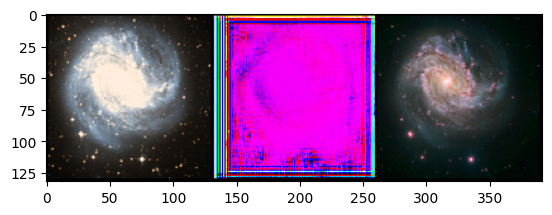

In [4]:
g_loss, d_loss = model.train(train_dataloader, load=False, save=True, sub=SUBSIZE, show_example=True)

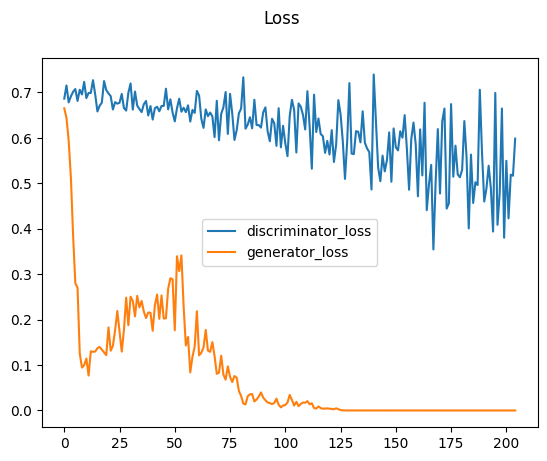

In [5]:
plt.suptitle('Loss')
plt.plot(d_loss, label='discriminator_loss')
plt.plot(g_loss, label='generator_loss')
plt.legend()
plt.show()

In [6]:
n_show = 8
ds_img = Img_Dataset(n=n_show, height=H, width=W, subsize=SUBSIZE, data_path=IMAGE_PATH, device="cpu")
dload_img = DataLoader(ds_img, batch_size=1, pin_memory=pin_mem)
surv_img_list = []
obs_img_list = []
for i, data in enumerate(dload_img, 0):
    surv_img_list.append(data[0])
    obs_img_list.append(data[1])
gen_img_list = model.generate(surv_img_list, device="cpu")

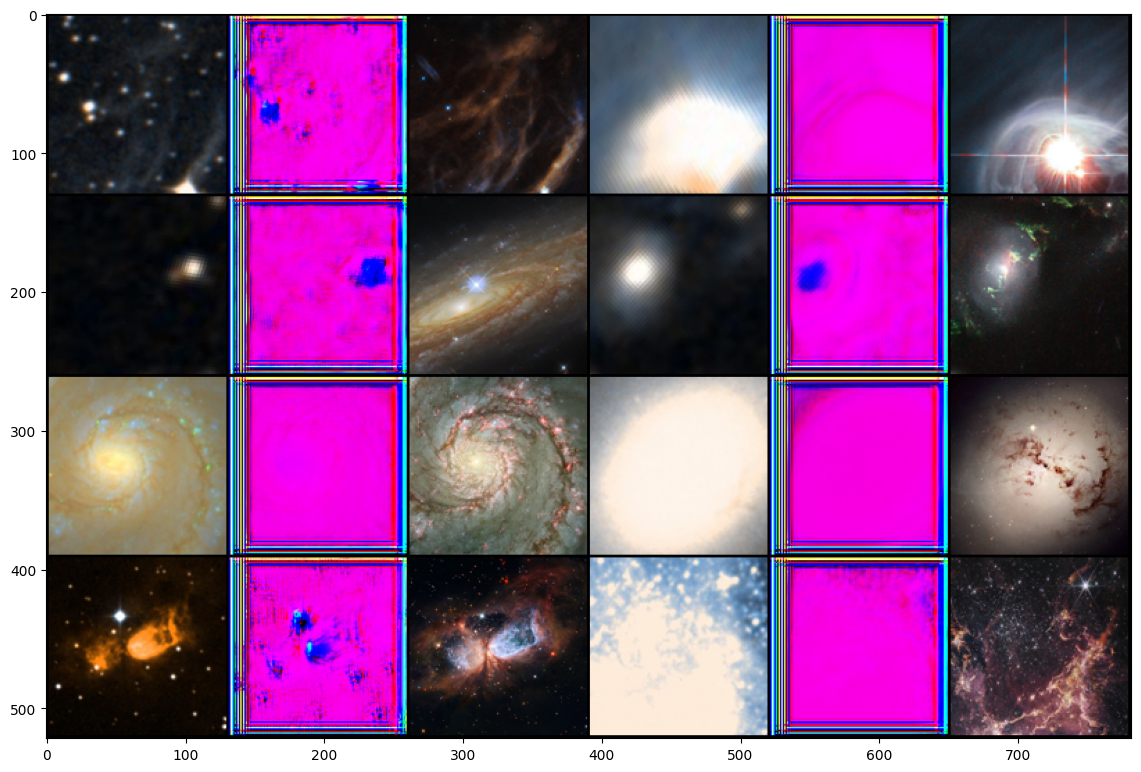

In [7]:
grouped_list = []
for i in range(len(surv_img_list)):
    grouped_list.append(surv_img_list[i][0])
    grouped_list.append(gen_img_list[i][0])
    grouped_list.append(obs_img_list[i][0])

plt.figure(figsize=(14, n_show*2))
plt.imshow(np.transpose(make_grid(grouped_list, padding=2, nrow=6, normalize=True).cpu(),(1,2,0)))